## **Methodology**

Neural Collaborative Filtering (NCF) is a deep learning-based framework for personalized recommendation. It replaces traditional matrix factorization approaches with a neural network, enabling more complex interactions between users and items.


### 1. **Representation of Users and Items**
Each user and item is represented by embedding vectors:
$
\text{User Embedding: } \mathbf{u}_i \in \mathbb{R}^d, \quad \text{Item Embedding: } \mathbf{v}_j \in \mathbb{R}^d
$
Where $ d $ is the embedding dimension.

These embeddings are learned during training and initialized randomly.


### 2. **Embedding Layers**
Given a user $ u $ and item $ i $:
- **User Embedding Layer**:
$
\mathbf{e}_u = \text{Embedding}(u), \quad \mathbf{e}_u \in \mathbb{R}^d
$
- **Item Embedding Layer**:
$
\mathbf{e}_i = \text{Embedding}(i), \quad \mathbf{e}_i \in \mathbb{R}^d
$


### 3. **Interaction of User and Item Embeddings**
The interaction between user and item embeddings forms the input to the neural network. The interaction can be captured using concatenation or other operations like element-wise multiplication:
- **Concatenation**:
$
\mathbf{x} = [\mathbf{e}_u, \mathbf{e}_i], \quad \mathbf{x} \in \mathbb{R}^{2d}
$

Other interaction mechanisms, such as generalized matrix factorization (GMF), can also be applied:
- **Element-wise Multiplication**:
$
\mathbf{x} = \mathbf{e}_u \odot \mathbf{e}_i, \quad \mathbf{x} \in \mathbb{R}^d
$


### 4. **Multi-Layer Perceptron (MLP)**
The concatenated interaction vector $ \mathbf{x} $ is passed through a multi-layer perceptron to model nonlinear interactions:
- **Input Layer**:
$
\mathbf{h}_0 = \mathbf{x}
$
- **Hidden Layers**:
$
\mathbf{h}_l = f(\mathbf{W}_l \mathbf{h}_{l-1} + \mathbf{b}_l), \quad l = 1, 2, \ldots, L
$
Where:
- $ \mathbf{W}_l, \mathbf{b}_l $ are the weights and biases of the $ l $-th layer.
- $ f $ is a non-linear activation function (e.g., ReLU).

- **Output Layer**:
$
\hat{y} = \sigma(\mathbf{W}_o \mathbf{h}_L + b_o)
$
Where $ \sigma $ is the sigmoid function to map predictions to the range \([0, 1]\).


### 5. **Objective Function**
The model is optimized using Mean Squared Error (MSE) for regression tasks or Binary Cross-Entropy (BCE) for implicit feedback:
- **MSE Loss** (for explicit feedback):
$
\mathcal{L} = \frac{1}{N} \sum_{(u, i)} \left( y_{ui} - \hat{y}_{ui} \right)^2
$
Where $ y_{ui} $ is the true rating and $ \hat{y}_{ui} $ is the predicted rating.

- **BCE Loss** (for implicit feedback):
$
\mathcal{L} = -\frac{1}{N} \sum_{(u, i)} \left[ y_{ui} \log(\hat{y}_{ui}) + (1 - y_{ui}) \log(1 - \hat{y}_{ui}) \right]
$


### 6. **Training Process**
1. **Input**:
   - User IDs and Item IDs are mapped to embeddings.
   - Ratings are used as labels.
2. **Forward Pass**:
   - Compute embeddings for users and items.
   - Interact embeddings using concatenation or element-wise multiplication.
   - Pass through the MLP to compute the predicted score $ \hat{y}_{ui} $.
3. **Loss Computation**:
   - Calculate the loss using the objective function.
4. **Backpropagation**:
   - Compute gradients with respect to the parameters.
   - Update parameters using an optimizer like Adam:
   $
   \theta \leftarrow \theta - \eta \cdot \nabla_\theta \mathcal{L}
   $
   Where $ \eta $ is the learning rate.

### 7. **Hyperparameter Tuning**
Hyperparameters include:
- **Embedding Dimension $(d)$**: Number of dimensions in user/item embeddings.
- **Learning Rate $(\eta)$**: Step size for the optimizer.
- **Number of Layers and Neurons in MLP**: Depth and width of the neural network.
- **Batch Size**: Number of samples per training step.
- **Number of Epochs**: Total number of training iterations.


### 8. **Evaluation Metrics**
- **Mean Squared Error (MSE)**:
$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$
- **Root Mean Squared Error (RMSE)**:
$
\text{RMSE} = \sqrt{\text{MSE}}
$
- **Precision and Recall**:
   -
   $
   \text{Precision@K} = \frac{\text{Relevant Items Recommended}}{\text{Total Items Recommended at K}}
   $
   
   -
   $
   \text{Recall@K} = \frac{\text{Relevant Items Recommended}}{\text{Total Relevant Items}}
   $

This methodology allows NCF to model complex relationships between users and items while providing flexibility to handle diverse types of recommendation data.

### Installing libraries

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


### LOading dataset and preprocessing

In [ ]:
from datasets import load_dataset
import pandas as pd

##Load the dataset
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", split="full", trust_remote_code=True)
data = dataset.to_pandas()
print("Columns in the dataset:")
print(data.columns)
print("\nFirst 5 rows of the dataset:")
print(data.head())
num_users = data['user_id'].nunique()
num_items = data['asin'].nunique()
print(f"\nNumber of unique users: {num_users}")
print(f"Number of unique items: {num_items}")

##Checkingg ratings statistics
print("\nRating statistics:")
print(data['rating'].describe())

### Map user_id and asin to numerical indices
user_id_mapping = {user_id: idx for idx, user_id in enumerate(data['user_id'].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(data['asin'].unique())}
data['user_idx'] = data['user_id'].map(user_id_mapping)
data['item_idx'] = data['asin'].map(item_id_mapping)
print("\nUser ID Mapping (first 5):")
print(list(user_id_mapping.items())[:5])
print("\nItem ID Mapping (first 5):")
print(list(item_id_mapping.items())[:5])

data.to_csv("prepared_data.csv", index=False)
print("\nPrepared data saved to 'prepared_data.csv'")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

Columns in the dataset:
Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

First 5 rows of the dataset:
   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text images        asin  \
0  This spray is really nice. It smells really go...     []  B00YQ6X8EO   
1  This product does what I need it to do, I just...     []  B081TJ8YS3   
2                          Smells good, feels great!     []  B07PNNCSP9   
3                                     Felt synthetic     []  B09JS339BZ   
4                                            Love it     []  B08BZ63GMJ   



### Training model and hyperparameter tuning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
##Loading the prepared data
import pandas as pd
data = pd.read_csv("prepared_data.csv")
NUM_USERS = data['user_idx'].nunique()
NUM_ITEMS = data['item_idx'].nunique()

##USing GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Split data into training and testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


class NCFDataset(Dataset):
    def __init__(self, df):
        self.users = torch.tensor(df['user_idx'].values, dtype=torch.long)
        self.items = torch.tensor(df['item_idx'].values, dtype=torch.long)
        self.ratings = torch.tensor(df['rating'].values, dtype=torch.float32)

    def __len__(self):
        return len(self.users)

    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.ratings[idx]
train_dataset = NCFDataset(train_data)
test_dataset = NCFDataset(test_data)
train_loader = DataLoader(train_dataset, batch_size=2048, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=2048, num_workers=4, pin_memory=True)

# Define NCF Model
class NCF(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim=32):
        super(NCF, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.item_embedding = nn.Embedding(num_items, embedding_dim)
        self.fc = nn.Sequential(
            nn.Linear(embedding_dim * 2, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1))
        self.sigmoid = nn.Sigmoid()
    def forward(self, user, item):
        user_emb = self.user_embedding(user)
        item_emb = self.item_embedding(item)
        concat = torch.cat([user_emb, item_emb], dim=-1)
        output = self.fc(concat)
        return self.sigmoid(output).squeeze()

# Hyperparameters to tune
epochs_list = [1, 2, 3, 4, 5]
learning_rates = [0.0001, 0.005, 0.001]
best_loss = float('inf')
best_epoch = None
best_lr = None
best_model = None

for epoch_count in epochs_list:
    for lr in learning_rates:
        model = NCF(NUM_USERS, NUM_ITEMS, embedding_dim=32).to(device)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Training loop
        print(f"Training with epochs={epoch_count}, learning_rate={lr}")
        for epoch in range(epoch_count):
            model.train()
            total_loss = 0
            for users, items, ratings in train_loader:
                users, items, ratings = users.to(device), items.to(device), ratings.to(device)
                optimizer.zero_grad()
                predictions = model(users, items)
                loss = criterion(predictions, ratings)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")
        # Evaluation of the model
        model.eval()
        with torch.no_grad():
            total_loss = 0
            for users, items, ratings in test_loader:
                users, items, ratings = users.to(device), items.to(device), ratings.to(device)
                predictions = model(users, items)
                loss = criterion(predictions, ratings)
                total_loss += loss.item()
            avg_loss = total_loss / len(test_loader)
            print(f"Test Loss (MSE): {avg_loss:.4f}")

            #Saving the bedt model
            if avg_loss < best_loss:
                best_loss = avg_loss
                best_epoch = epoch_count
                best_lr = lr
                best_model = model

print(f"Best Hyperparameters: Epochs={best_epoch}, Learning Rate={best_lr}")

Using device: cuda


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training with epochs=1, learning_rate=0.0001


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1, Loss: 3436.8291
Test Loss (MSE): 11.3086
Training with epochs=1, learning_rate=0.005
Epoch 1, Loss: 3035.3128
Test Loss (MSE): 11.0013
Training with epochs=1, learning_rate=0.001
Epoch 1, Loss: 3069.7553
Test Loss (MSE): 11.0017
Training with epochs=2, learning_rate=0.0001
Epoch 1, Loss: 3479.7805
Epoch 2, Loss: 3064.7621
Test Loss (MSE): 11.0599
Training with epochs=2, learning_rate=0.005
Epoch 1, Loss: 3035.0900
Epoch 2, Loss: 3022.6882
Test Loss (MSE): 11.0013
Training with epochs=2, learning_rate=0.001
Epoch 1, Loss: 3065.7431
Epoch 2, Loss: 3023.3201
Test Loss (MSE): 11.0017
Training with epochs=3, learning_rate=0.0001
Epoch 1, Loss: 3440.1900
Epoch 2, Loss: 3054.6710
Epoch 3, Loss: 3032.1750
Test Loss (MSE): 11.0206
Training with epochs=3, learning_rate=0.005
Epoch 1, Loss: 3033.2783
Epoch 2, Loss: 3023.3781
Epoch 3, Loss: 3022.2053
Test Loss (MSE): 11.0013
Training with epochs=3, learning_rate=0.001
Epoch 1, Loss: 3068.8876
Epoch 2, Loss: 3024.1802
Epoch 3, Loss: 3023.3

In [ ]:
import math
mse = best_loss / len(test_loader)
rmse = math.sqrt(mse)
print(f"Test Loss (RMSE): {rmse:.4f}")

Test Loss (RMSE): 0.3993


In [ ]:
##Loading raw review data
from datasets import load_dataset
import pandas as pd
## Load the raw review dataset
raw_reviews = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", split="full", trust_remote_code=True)
raw_reviews = raw_reviews.to_pandas()
##Print structure of raw review data
print("Columns in the raw review dataset:")
print(raw_reviews.columns)
print("\nFirst 5 rows of the raw review dataset:")
print(raw_reviews.head())

metadata = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)
metadata = metadata.to_pandas()
print("\nColumns in the metadata dataset:")
print(metadata.columns)
print("\nFirst 5 rows of the metadata dataset:")
print(metadata.head())


Columns in the raw review dataset:
Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

First 5 rows of the raw review dataset:
   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text images        asin  \
0  This spray is really nice. It smells really go...     []  B00YQ6X8EO   
1  This product does what I need it to do, I just...     []  B081TJ8YS3   
2                          Smells good, feels great!     []  B07PNNCSP9   
3                                     Felt synthetic     []  B09JS339BZ   
4                                            Love it  

meta_All_Beauty.jsonl:   0%|          | 0.00/213M [00:00<?, ?B/s]

Generating full split:   0%|          | 0/112590 [00:00<?, ? examples/s]


Columns in the metadata dataset:
Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
      dtype='object')

First 5 rows of the metadata dataset:
  main_category                                              title  \
0    All Beauty  Howard LC0008 Leather Conditioner, 8-Ounce (4-...   
1    All Beauty  Yes to Tomatoes Detoxifying Charcoal Cleanser ...   
2    All Beauty   Eye Patch Black Adult with Tie Band (6 Per Pack)   
3    All Beauty  Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...   
4    All Beauty  Precision Plunger Bars for Cartridge Grips – 9...   

   average_rating  rating_number  \
0             4.8             10   
1             4.5              3   
2             4.4             26   
3             3.1            102   
4             4.3              7   

                                      

### Printing some outputs

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from datasets import load_dataset

raw_data = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", split="full", trust_remote_code=True)
raw_data = raw_data.to_pandas()
metadata = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)
metadata = metadata.to_pandas()

asin_to_title = metadata.set_index("parent_asin")["title"].to_dict()
user_id_mapping = {user_id: idx for idx, user_id in enumerate(raw_data["user_id"].unique())}
item_id_mapping = {asin: idx for idx, asin in enumerate(raw_data["asin"].unique())}
raw_data["user_idx"] = raw_data["user_id"].map(user_id_mapping)
raw_data["item_idx"] = raw_data["asin"].map(item_id_mapping)

## Functiom to generate top N recommendations for a user
def recommend_for_user(model, user_idx, all_items, interacted_items, top_k=10):
    user_tensor = torch.tensor([user_idx] * len(all_items), dtype=torch.long).to(device)
    item_tensor = torch.tensor(all_items, dtype=torch.long).to(device)
    model = best_model
    # Predict ratings for all items
    model.eval()
    with torch.no_grad():
        predictions = model(user_tensor, item_tensor)
    all_items = pd.Series(all_items)
    predictions = pd.Series(predictions.cpu().numpy())
    filtered_items = all_items[~all_items.isin(interacted_items)]
    filtered_predictions = predictions[~all_items.isin(interacted_items)]
    ##Get top-K recommendations
    top_indices = filtered_predictions.nlargest(top_k).index
    recommended_items = filtered_items.iloc[top_indices].tolist()
    return recommended_items

selected_users = raw_data["user_idx"].sample(10).unique()
all_items = raw_data["item_idx"].unique()

# Generate recommendations for 10 users
recommendations = {}
for user_idx in tqdm(selected_users, desc="Generating Recommendations"):
    interacted_items = set(raw_data[raw_data["user_idx"] == user_idx]["item_idx"].tolist())
    top_items = recommend_for_user(model, user_idx, all_items, interacted_items, top_k=10)

    recommendations[user_idx] = [
        asin_to_title.get(raw_data.loc[raw_data["item_idx"] == item, "asin"].values[0], "Unknown Title")
        for item in top_items
    ]

for user_idx, titles in recommendations.items():
    user_id = [user for user, idx in user_id_mapping.items() if idx == user_idx][0]

    print(f"\nRecommendations for User {user_id}:")
    for rank, title in enumerate(titles, 1):
        print(f"{rank}. {title}")

Generating Recommendations: 100%|██████████| 10/10 [00:00<00:00, 26.46it/s]



Recommendations for User AHBKWGPARWDYOLJN5FZAAE73M3MA:
1. Herbivore - Natural Sea Mist Texturizing Salt Spray (Coconut, 8 oz)
2. All Natural Vegan Dry Shampoo Powder - Eco Friendly, Root Touch Up | Hair Powder Volumizer | For Brown Hair, Brunette and Dark Hair. (Brun + Application Brush) Two Goats Apothecary
3. Unknown Title
4. muaowig Ombre Body Wave Bundles 1B Grey Human Hair Bundles 8 10 12 inch Hair Weave Body Wave Brazilian Remy Hair Bundles Ombre Hair Extensions 3 Bundles By Muao,Grey Body Wave
5. Yinhua Electric Nail Drill Kit Portable Professional Nail Drill Manicure Pen Shape Acrylic Nail Tools for Exfoliation Polishing with 6 Drill Bits and Sanding Bands for Home Salon (1 Set, green)
6. China Glaze Nail Polish, Wanderlust 1381
7. Disposable Facial Cotton Tissue, 100PCS Cotton Towels Face Cleansing Wipes for Sensitive Skin, Makeup Remover Washcloth Dry and Wet Use
8. Unknown Title
9. NIRA Skincare Laser & Serum Bundle - Includes Anti-Aging Laser & Hyaluronic Acid Serum - Redu

### Plotting recommendations

Generating Recommendations for Plot: 100%|██████████| 10/10 [00:00<00:00, 27.54it/s]
<ipython-input-7-fea2f769d194>:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


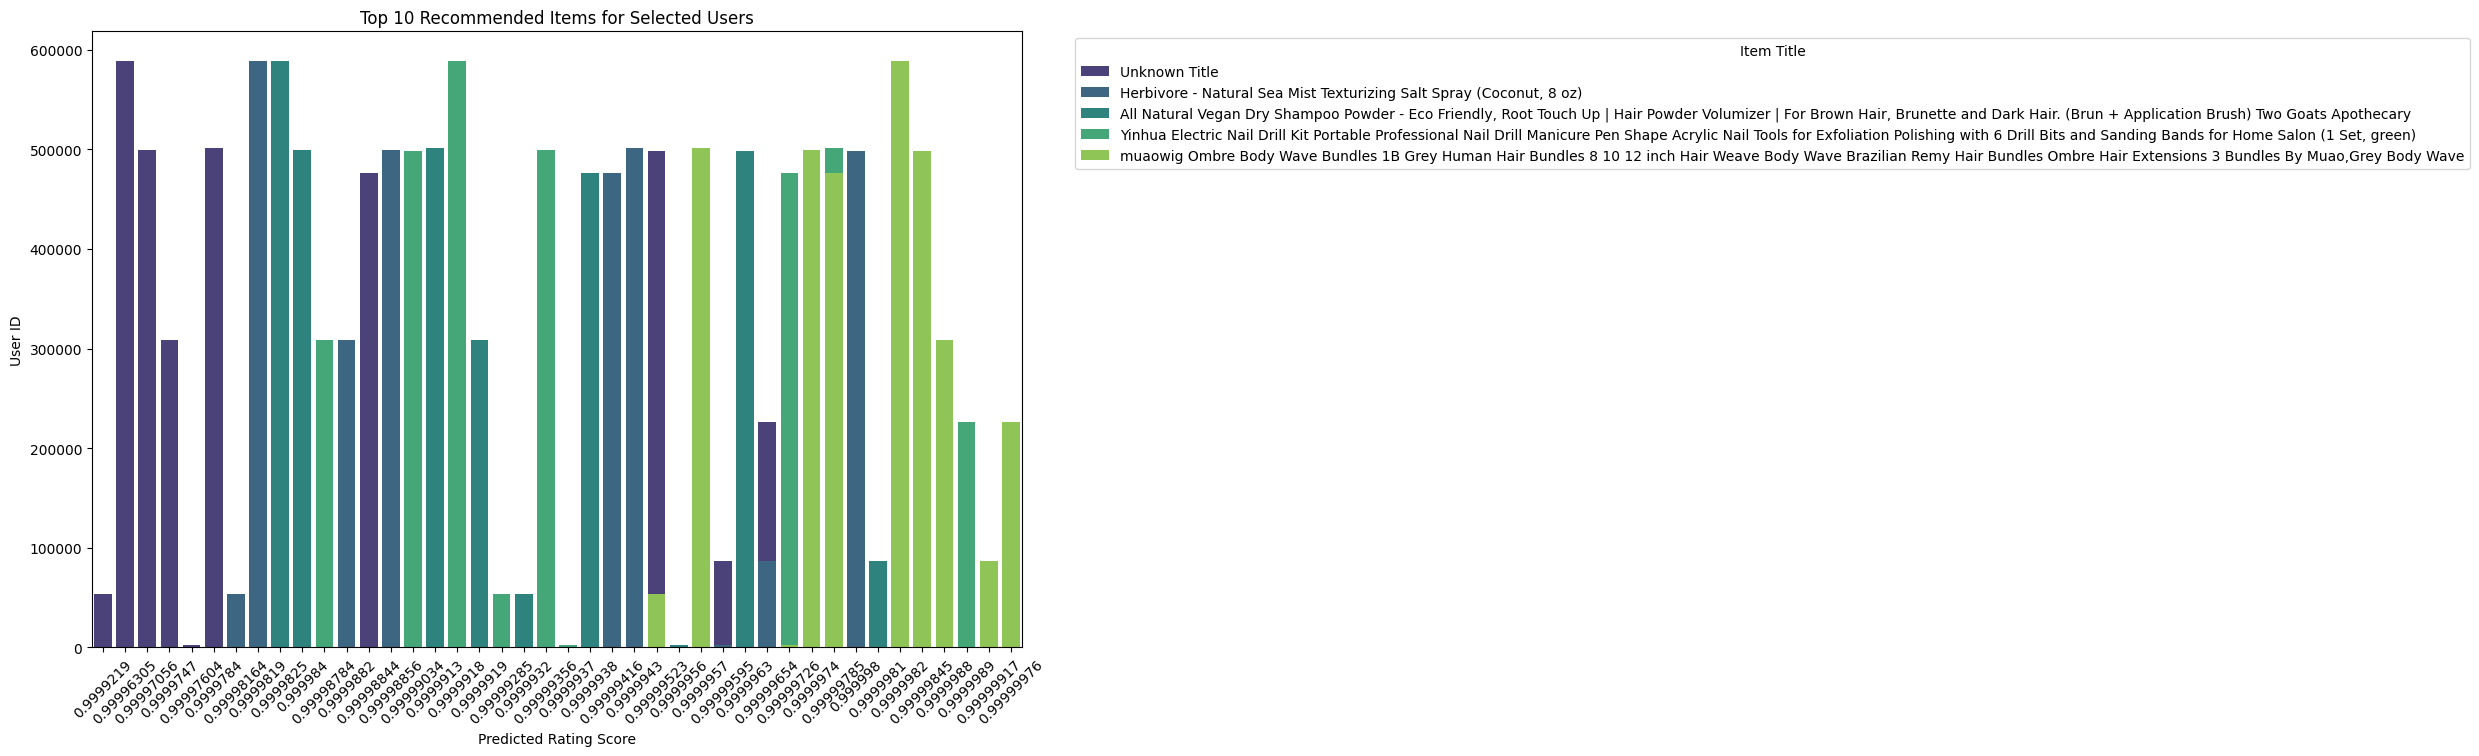

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
user_ids = []
item_titles = []
predicted_scores = []
for user_idx in tqdm(selected_users, desc="Generating Recommendations for Plot"):
    interacted_items = set(raw_data[raw_data["user_idx"] == user_idx]["item_idx"].tolist())
    top_items = recommend_for_user(model, user_idx, all_items, interacted_items, top_k=5)
    user_tensor = torch.tensor([user_idx] * len(top_items), dtype=torch.long).to(device)
    item_tensor = torch.tensor(top_items, dtype=torch.long).to(device)
    model.eval()
    with torch.no_grad():
        predictions = model(user_tensor, item_tensor).cpu().numpy()
    for item, score in zip(top_items, predictions):
        item_title = asin_to_title.get(raw_data.loc[raw_data["item_idx"] == item, "asin"].values[0], "Unknown Title")
        user_ids.append(user_idx)
        item_titles.append(item_title)
        predicted_scores.append(score)

df = pd.DataFrame({
    'User ID': user_ids,
    'Item Title': item_titles,
    'Predicted Score': predicted_scores})
##Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=df,y='User ID',  x='Predicted Score',  hue='Item Title', dodge=False, palette='viridis')

plt.title('Top 10 Recommended Items for Selected Users')
plt.xlabel('Predicted Rating Score')
plt.ylabel('User ID')
plt.legend(title='Item Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.types import StructType, StructField, IntegerType, FloatType
from pyspark import SparkContext

spark = SparkSession.builder.appName("PrecisionRecall").getOrCreate()
sc = SparkContext.getOrCreate()

## Broadcast the model and items
broadcast_model = sc.broadcast(model)
broadcast_all_items = sc.broadcast(all_items)  ##Broadcast all items list
broadcast_raw_data = sc.broadcast(raw_data)

def precision_at_k_spark(recommended_items, interacted_items, k=10):
    relevant_items = set(recommended_items).intersection(interacted_items)
    return len(relevant_items) / k

def recall_at_k_spark(recommended_items, interacted_items, k=10):
    relevant_items = set(recommended_items).intersection(interacted_items)
    return len(relevant_items) / len(interacted_items)
def get_recommended_items(user_idx):
    interacted_items = set(broadcast_raw_data.value[broadcast_raw_data.value["user_idx"] == user_idx]["item_idx"].tolist())
    recommended_items = recommend_for_user(broadcast_model.value, user_idx, broadcast_all_items.value, interacted_items, top_k=10)
    return recommended_items

user_recommendations = spark.createDataFrame(
    [(user_idx, get_recommended_items(user_idx)) for user_idx in raw_data["user_idx"].unique()],
    schema=StructType([
        StructField("user_idx", IntegerType(), True),
        StructField("recommended_items", FloatType(), True)
    ])
)

user_interactions_df = spark.createDataFrame(broadcast_raw_data.value[["user_idx", "item_idx"]])

broadcast_user_interactions = sc.broadcast(user_interactions_df)
recommendations_df = user_recommendations.select("user_idx", F.explode("recommended_items").alias("recommended_item"))
interactions_df = broadcast_user_interactions.value.withColumn("interacted_item", F.col("item_idx"))

#Perform a broadcast join
joined_df = recommendations_df.join(
    interactions_df, recommendations_df.user_idx == interactions_df.user_idx, "inner"
)

## COmpute precision and recall
#Group by user_idx
#Compute precision and recall
metrics_df = joined_df.groupBy("user_idx").agg(
    (F.countDistinct(F.when(F.col("recommended_item") == F.col("interacted_item"), F.col("recommended_item"))) / 10).alias("precision"),
    (F.countDistinct(F.when(F.col("recommended_item") == F.col("interacted_item"), F.col("recommended_item"))) /
     F.countDistinct("interacted_item")).alias("recall")
)

mean_precision = metrics_df.agg(F.mean("precision")).collect()[0][0]
mean_recall = metrics_df.agg(F.mean("recall")).collect()[0][0]

print(f"Mean Precision@10: {mean_precision:.4f}")
print(f"Mean Recall@10: {mean_recall:.4f}")

'\nfrom pyspark.sql import SparkSession, functions as F\nfrom pyspark.sql.types import StructType, StructField, IntegerType, FloatType\nfrom pyspark import SparkContext\n\n# Initialize Spark session and context\nspark = SparkSession.builder.appName("PrecisionRecall").getOrCreate()\nsc = SparkContext.getOrCreate()\n\n# Broadcast the model and items (example)\nbroadcast_model = sc.broadcast(model)  # Broadcast your model\nbroadcast_all_items = sc.broadcast(all_items)  # Broadcast all items list\n\n# Broadcast raw data for interactions (assuming raw_data is a DataFrame)\nbroadcast_raw_data = sc.broadcast(raw_data)\n\n# Define precision and recall functions for Spark\ndef precision_at_k_spark(recommended_items, interacted_items, k=10):\n    relevant_items = set(recommended_items).intersection(interacted_items)\n    return len(relevant_items) / k\n\ndef recall_at_k_spark(recommended_items, interacted_items, k=10):\n    relevant_items = set(recommended_items).intersection(interacted_items)\n

In [ ]:
user_id_to_check = 'AGKHLEW2SOWHNMFQIJGBECAF7INQ'
user_idx_to_check = user_id_mapping.get(user_id_to_check)

if user_idx_to_check is not None:
    interacted_items = set(raw_data[raw_data["user_idx"] == user_idx_to_check]["item_idx"].tolist())
    top_items = recommend_for_user(model, user_idx_to_check, all_items, interacted_items, top_k=10)

    recommendations_for_user = [
        asin_to_title.get(raw_data.loc[raw_data["item_idx"] == item, "asin"].values[0], "Unknown Title")
        for item in top_items
    ]
    print(f"\nRecommendations for User {user_id_to_check}:")
    for rank, title in enumerate(recommendations_for_user, 1):
        print(f"{rank}. {title}")
else:
    print(f"No recommendations found for User {user_id_to_check}.")



Recommendations for User AGKHLEW2SOWHNMFQIJGBECAF7INQ:
1. Yinhua Electric Nail Drill Kit Portable Professional Nail Drill Manicure Pen Shape Acrylic Nail Tools for Exfoliation Polishing with 6 Drill Bits and Sanding Bands for Home Salon (1 Set, green)
2. China Glaze Nail Polish, Wanderlust 1381
3. Unknown Title
4. NIRA Skincare Laser & Serum Bundle - Includes Anti-Aging Laser & Hyaluronic Acid Serum - Reduces Appearance of Fine Lines & Wrinkles - FDA Cleared
5. Caroline Keller Keratin Shampoo for dry and damaged hair and scalp. With Argan oil, Avocado oil Keratin and Vitamins. Specially formulated for Post Keratin Treatments. Salt Free. 16.9 fl.Oz
6. Orange Peel Nature's Cleanse Facial Scrub - by Visage Pure - USDA Organic - Physician Formulated - Research Supported - Natural Exfoliating, Refreshing, Brightening, Skin Tightening Vitamin C Scrub. Cleans the Pores Deeply and Refreshes the Skin Bringing Back Its Glow
7. OGANA CELL Peptide Concentrating Amazing Lotion 2.03 fl.oz. (60ml) -